In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv 
import os
import numpy as np
import matplotlib.pyplot as plt

**Rename the data each image will have a number name**

In [5]:

import os
os.getcwd()
i=0
collection = "/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive/" + filename, "/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive/" + str(i+1) + ".jpg")

In [6]:
import os
os.getcwd()
collection = "//content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("//content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative/" + filename, "//content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative/" + str(i+2567) + ".jpg")

**Resize the data**

In [7]:
import os
from PIL import Image

f = r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

In [8]:
import os
from PIL import Image

f = r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((256,256))
    img.save(f_img)

**Applying morphology on one image**


we will apply **Opening** on negative data


and **Closing** on positive data

**Sample from positive data**

<function matplotlib.pyplot.show>

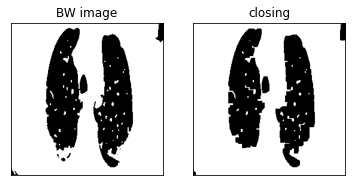

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread(r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive/10.jpg')
Median1=cv.medianBlur(image,3)
ret,mask=cv.threshold(Median1, 127,255,cv.THRESH_BINARY)

kernel=np.ones((3,3), np.uint8)
plt.figure()  
closing=cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel,iterations=3)
titles=["BW image","closing"]
images=[mask,closing]
# cv.imwrite(image,closing
# Plotting the image and the mask 
for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  cv.imwrite('/content/drive/MyDrive/Covid19 CT Classification /new.jpg',images[i])
  mng = plt.get_current_fig_manager()
  mng.full_screen_toggle()
plt.show

**Sample from negative data**

<function matplotlib.pyplot.show>

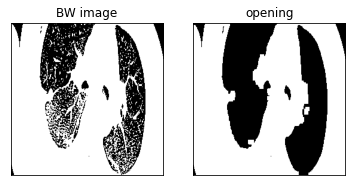

In [12]:
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread(r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative/2568.jpg')
Median1=cv.medianBlur(image,3)
ret,mask=cv.threshold(image, 127,255,cv.THRESH_BINARY)

kernel=np.ones((3,3), np.uint8)
plt.figure()  
opening=cv.morphologyEx(mask, cv.MORPH_OPEN, kernel,iterations=3)
titles=["BW image","opening"]
images=[mask,opening]
# Plotting the image and the mask 
for i in range(2):
  plt.subplot(1, 2, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  mng = plt.get_current_fig_manager()
  mng.full_screen_toggle()
plt.show

**Apply morphological operation and median blur thresholding on the whole data**

**saving the new data in new folder called Covid19Dataset/Positive_Morph**

In [13]:
import cv2 as cv
from PIL import Image
import numpy as np
f = r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/positive'
for file in os.listdir(f):
   image = cv.imread(f+"//"+file)
   Median1=cv.medianBlur(image,3)
   ret,mask=cv.threshold(Median1, 127,255,cv.THRESH_BINARY)
   kernel=np.ones((3,3), np.uint8)
 
   closing=cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel,iterations=3)
   #saving the new data in new folder called Covid19Dataset/Positive_Morph
   cv.imwrite('/content/drive/MyDrive/Covid19Dataset/Positive_Morph/'+file+'.jpg', closing)


**saving the new data in new folder called Covid19Dataset/Negative_Morph**

In [14]:
import cv2 as cv
from PIL import Image
f = r'/content/drive/MyDrive/Covid19 CT Classification /FINALfinal/negative'
for file in os.listdir(f):
   image = cv.imread(f+"//"+file)
   Median1=cv.medianBlur(image,3)
   ret,mask=cv.threshold(Median1, 127,255,cv.THRESH_BINARY)
   kernel=np.ones((3,3), np.uint8)
 
   opening=cv.morphologyEx(mask, cv.MORPH_OPEN, kernel,iterations=3)
   cv.imwrite('/content/drive/MyDrive/Covid19Dataset/Negative_Morph/'+file+'.jpg', opening)

**create csv file** 

**we split the data in csv file 80% for training and 20% testing**

In [19]:
import pandas as pd
ll=[]
df1 = pd.DataFrame()
path ='/content/drive/MyDrive/Covid19 CT Classification /Covid19Dataset/Negative_Morph'
for i in os.listdir(path):
  ll.append(i)
df1['id'] = ll
df1['status'] = 0
df1.loc[0:2161,'DataType'] = 'TRAIN'
df1.loc[2161:,'DataType'] = 'TEST'
df1 

,id,status,DataType
0,4077.jpg.jpg,0,TRAIN
1,4078.jpg.jpg,0,TRAIN
2,4079.jpg.jpg,0,TRAIN
3,4080.jpg.jpg,0,TRAIN
4,4081.jpg.jpg,0,TRAIN
...,...,...,...
2697,5085.jpg.jpg,0,TEST
2698,5086.jpg.jpg,0,TEST
2699,5087.jpg.jpg,0,TEST
2700,5088.jpg.jpg,0,TEST


In [ ]:
df1[df1["DataType"].str.contains('TRAIN', na=False)] 

,id,status,DataType
0,4077.jpg.jpg,0,TRAIN
1,4078.jpg.jpg,0,TRAIN
2,4079.jpg.jpg,0,TRAIN
3,4080.jpg.jpg,0,TRAIN
4,4081.jpg.jpg,0,TRAIN
...,...,...,...
2156,4546.jpg.jpg,0,TRAIN
2157,4545.jpg.jpg,0,TRAIN
2158,4544.jpg.jpg,0,TRAIN
2159,4547.jpg.jpg,0,TRAIN


**Notice that our csv file has 3 columns :**

**id: which represents the name of the image**

**status: to determine if the patient has corona virus or not 0 means non_covid**

**datatype: to know if that data is for training or testing**

**We did the same operations for positive mporph data**

In [20]:
import pandas as pd
l=[]
df2 = pd.DataFrame()
path ='/content/drive/MyDrive/Covid19 CT Classification /Covid19Dataset/Positive_Morph'
for i in os.listdir(path):
  l.append(i)
df2['id'] = l
df2['status'] = 1
df2.loc[0:2052,'DataType'] = 'TRAIN'
df2.loc[2052:,'DataType'] = 'TEST'

df2.head()

,id,status,DataType
0,1132.jpg.jpg,1,TRAIN
1,1133.jpg.jpg,1,TRAIN
2,1134.jpg.jpg,1,TRAIN
3,1135.jpg.jpg,1,TRAIN
4,1136.jpg.jpg,1,TRAIN


**we combine the 2 dataframes for negative and positive together and show the results**

In [21]:
frames = [df1, df2]
  
result = pd.concat(frames)
display(result)

,id,status,DataType
0,4077.jpg.jpg,0,TRAIN
1,4078.jpg.jpg,0,TRAIN
2,4079.jpg.jpg,0,TRAIN
3,4080.jpg.jpg,0,TRAIN
4,4081.jpg.jpg,0,TRAIN
...,...,...,...
2561,2127.jpg.jpg,1,TEST
2562,2128.jpg.jpg,1,TEST
2563,2129.jpg.jpg,1,TEST
2564,2130.jpg.jpg,1,TEST


**Check if our dataframe has non_values**

In [22]:
result.isnull().sum()

id          0
status      0
DataType    0
dtype: int64

In [ ]:

result = result.sample(frac = 1)

**Saving the result in csv file called patients_status**

In [23]:
result.to_csv('/content/drive/MyDrive/Covid19 CT Classification /Covid19Dataset/patients_status.csv')